In [1]:
import subprocess
import os
import glob
import time

In [2]:
create_tf_record_py = '/home/golden/Dropbox/kenya-tracking/code/pre-processing/create_tf_records_from_image_folder.py'      
root_image_folder = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage' 
tf_records_folder = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords'
num_threads = 8
train_shards = 40

process_folder = True
process_file = False

if process_folder:
    image_folder_list = glob.glob(root_image_folder + '*/*')
    

if process_file:
    image_file = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088'
    image_folder_list = [image_file]
    
existing_tfrecord_list = glob.glob(tf_records_folder + '*/*')

image_folder_names = [os.path.basename(image_folder) for image_folder in image_folder_list] 
existing_tfrecord_names = [os.path.basename(existing_tfrecord) for existing_tfrecord in existing_tfrecord_list]

new_image_folders = []


for image_folder_ind, image_folder_name in enumerate(image_folder_names):

    if image_folder_name not in existing_tfrecord_names:
        new_image_folders.append(image_folder_list[image_folder_ind])




In [3]:
# new_image_folders.sort()
new_image_folders = new_image_folders[1:2]
print(new_image_folders)
print(len(glob.glob(new_image_folders[0] + '/*/*.jpg', recursive=True)))

['/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088']
90735


In [4]:
%env CUDA_VISIBLE_DEVICES=

for image_folder in new_image_folders[:]:
    if not os.path.exists(tf_records_folder): 
        os.makedirs(tf_records_folder)
    animal_type = image_folder.split('/')[-2]
    new_record_folder = os.path.join(tf_records_folder, animal_type, os.path.basename(image_folder))
    if not os.path.exists(new_record_folder): 
        os.makedirs(new_record_folder)
    print('saving at ', new_record_folder)
    num_raw_images = len(os.listdir(image_folder))
    print('There are ' , num_raw_images, ' items in the given image folder')
    


env: CUDA_VISIBLE_DEVICES=
saving at  /media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/observation088
There are  13  items in the given image folder


In [5]:
    process = subprocess.run(['python', create_tf_record_py, 
                '--train_directory', image_folder, 
                '--output_directory', new_record_folder,
                '--train_shards', str(train_shards),
                '--num_threads', str(num_threads)])
    while process.returncode != 0:
        time.sleep(10)

## The below code can be used to inspect the created tfrecords file

In [1]:
# tf_record_files = [os.path.join(new_record_folder, file) for file in os.listdir(new_record_folder)]
tf_record_files = ['/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/raw-footage/observation088/train-00000-of-00040']
print(tf_record_files)

['/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/raw-footage/observation088/train-00000-of-00040']


In [6]:
import tensorflow as tf

count = 0
training_record = False
an_list = []
for example in tf.python_io.tf_record_iterator(tf_record_files[0]):
    count += 1
    result = tf.train.Example.FromString(example)
    if not training_record:
        if count % 100 == 0:
            print(result.features.feature['image/filename'].bytes_list.value[0])
    else:

    #     if result.features.feature['image/height'].int64_list.value[0] <= 0:
    #         print('height', result.features.feature['image/height'].int64_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/width'].int64_list.value[0] <= 0:
    #         print('width', result.features.feature['image/width'].int64_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/xmin'].float_list.value[0] <= 0:
    #         print('xmin sm', result.features.feature['image/object/bbox/xmin'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/ymin'].float_list.value[0] <= 0:
    #         print('ymin smal', result.features.feature['image/object/bbox/ymin'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/xmax'].float_list.value[0] <= 0:
    #         print('xmax sma', result.features.feature['image/object/bbox/xmax'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/ymax'].float_list.value[0] <= 0:
    #         print('ymax smal', result.features.feature['image/object/bbox/ymax'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/xmin'].float_list.value[0] >= 1:
    #         print('xminbig', result.features.feature['image/object/bbox/xmin'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/ymin'].float_list.value[0] >= 1:
    #         print('ymin big', result.features.feature['image/object/bbox/ymin'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/xmax'].float_list.value[0] >= 1:
    #         print('xmax big', result.features.feature['image/object/bbox/xmax'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
    #     if result.features.feature['image/object/bbox/ymax'].float_list.value[0] >= 1:
    #         print('ymax big', result.features.feature['image/object/bbox/ymax'].float_list.value[0])
    #         print(result.features.feature['image/filename'].bytes_list.value[0])
        an_list.extend(result.features.feature['image/object/class/label'].int64_list.value[:])
        if result.features.feature['image/object/class/label'].int64_list.value[0] >= 5 or result.features.feature['image/object/class/label'].int64_list.value[0] < 1:
            print('ymax big', result.features.feature['image/object/class/label'].int64_list.value[0])
            print(result.features.feature['image/filename'].bytes_list.value[0])
    
#     if count % 100 == 0:
#         print('count', count)

b'APR08_2018_A_DJI_0005_6444.jpg'
b'APR08_2018_A_DJI_0005_6644.jpg'
b'APR08_2018_A_DJI_0005_6844.jpg'
b'APR08_2018_A_DJI_0005_7044.jpg'
b'APR08_2018_A_DJI_0005_7244.jpg'
b'APR08_2018_A_DJI_0005_7444.jpg'
b'APR08_2018_A_DJI_0005_7644.jpg'
b'APR08_2018_A_DJI_0005_7844.jpg'
b'APR08_2018_A_DJI_0005_8044.jpg'
b'APR08_2018_A_DJI_0005_8244.jpg'
b'APR08_2018_A_DJI_0005_8444.jpg'
b'APR08_2018_A_DJI_0005_8644.jpg'
b'APR08_2018_A_DJI_0005_8844.jpg'
b'APR08_2018_A_DJI_0005_9044.jpg'
b'APR08_2018_A_DJI_0005_9244.jpg'
b'APR08_2018_A_DJI_0005_9444.jpg'
b'APR08_2018_A_DJI_0005_9644.jpg'
b'APR08_2018_A_DJI_0005_9844.jpg'
b'APR08_2018_A_DJI_0005_10044.jpg'
b'APR08_2018_A_DJI_0005_10244.jpg'
b'APR08_2018_A_DJI_0005_10444.jpg'
b'APR08_2018_A_DJI_0005_10644.jpg'


In [10]:
 print(result.features.feature['image/filename'].bytes_list.value[0])

b'ob006_19801.jpg'


In [11]:
import matplotlib.pyplot as plt

(array([4723.,    0., 1276.,    0.,    0., 3776.,    0.,  710.,    0.,
         347.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

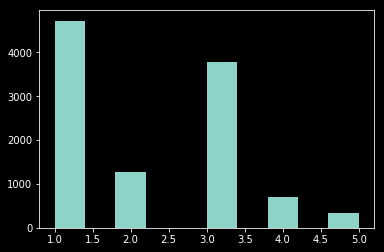

In [12]:
plt.style.use('dark_background')
plt.hist(an_list)